# graphen energy band

In [1]:
import numpy as np
from tqdm import tqdm
import sys
import os
import matplotlib.pyplot as plt
sys.path.append('..')
from src.graphene import BandOfGraphene

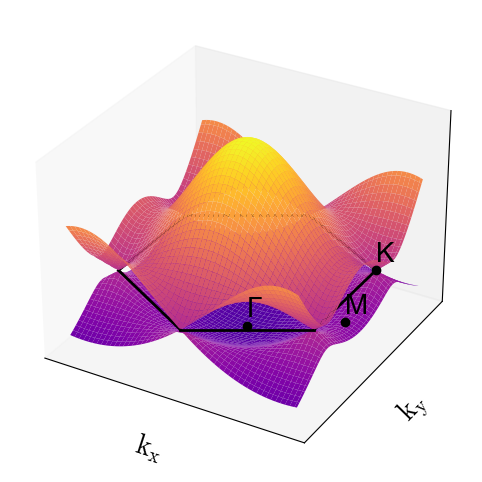

In [2]:
mygraphene = BandOfGraphene()
mygraphene.plot()

# DOS

カーボンナノチューブの基礎と応用 p17

https://qiita.com/PlusF/items/0e583c1adfae54fca268

一般に，エネルギー$\epsilon$における状態密度は，デルタ関数の和であらわされる．
```math
D(\epsilon)=\frac{1}{V}\sum_{\vec{k}}{\delta(\epsilon-E(\vec{k}))}
```
このとき，$V$は系の体積であり，取りうるすべての波数$\vec{k}$の和を考える．単層CNTの電子状態密度は，波数が量子化されることから，以下のようになる．
```math
D(\epsilon)=\frac{1}{2\pi}\int_{-\frac{\pi}{|\vec{T}|}}^{\frac{\pi}{|\vec{T}|}}\sum_{\mu=0}^{N-1}{\delta(\epsilon-E_\mu(k))\mathrm{d}k}
```

In [3]:
def delta(x, n_delta=10000):  # ガウス関数で近似. nを大きくするほどデルタ関数に近づく
    ret = np.exp(-1 * n_delta * x ** 2)
    return np.sqrt(n_delta / np.pi) * ret

In [4]:
class DOSOfCNT:
    a = 2.46
    a1 = np.array([np.sqrt(3) / 2, 1 / 2]) * a
    a2 = np.array([np.sqrt(3) / 2, - 1 / 2]) * a

    def __init__(self, n: int, m: int):
        self.n = n
        self.m = m
        # カイラルベクトル
        self.Ch = n * self.a1 + m * self.a2
        self.L = np.linalg.norm(self.Ch)
        # 直径
        self.d_tube = self.L / np.pi
        gcd = np.gcd(2 * m + n, 2 * n + m)
        self.t1 = (2 * m + n) / gcd
        self.t2 = -1 * (2 * n + m) / gcd
        # 並進ベクトル
        self.T = self.t1 * self.a1 + self.t2 * self.a2
        # 単位胞内の六角形の数
        self.N = int(2 * (n ** 2 + m ** 2 + n * m) / gcd)

        # 逆格子ベクトル
        self.b1 = np.array([1 / np.sqrt(3), 1]) * 2 * np.pi / self.a
        self.b2 = np.array([1 / np.sqrt(3), -1]) * 2 * np.pi / self.a
        self.K1 = 1 / self.N * (- self.t2 * self.b1 + self.t1 * self.b2)
        self.K2 = 1 / self.N * (m * self.b1 - n * self.b2)
        # 積分の範囲
        k_min = -1 * np.pi / np.linalg.norm(self.T)
        k_max = np.pi / np.linalg.norm(self.T)
        self.dk = 1 / 1000
        self.k_range = np.linspace(k_min, k_max, int(1 / self.dk))

        self.band_of_graphene = BandOfGraphene()
        self.band_of_graphene.s = 0  # 結合性バンド，半結合性バンドが対称になる

    def E_mu(self, k, mu, sign):  # グラフェンのエネルギー分散関係に，CNTの量子化条件を入れる
        x, y = k * self.K2 / np.linalg.norm(self.K2) + mu * self.K1
        return self.band_of_graphene.E_2g(x, y, sign)

    def DOS(self, E):
        ret = 0
        for k in tqdm(self.k_range):
            for mu in range(1, self.N + 1):
                ret += self.dk * (delta(E - self.E_mu(k, mu, '+')) + delta(E - self.E_mu(k, mu, '-')))  # 結合性バンドと反結合性バンドのDOSの和
        return ret / (2 * np.pi) / 2
    
    def plot_band(self, n_range :int = 3) -> None:
        plt.figure(figsize=(10, 10))
        for mu in range(n_range + 1):
            E_plus = [self.E_mu(k_, mu, '+') for k_ in self.k_range]
            plt.plot(self.k_range, E_plus, color='k', label=f"$\pm {mu}$")
            E_minus = [self.E_mu(k_, -1*mu, '-') for k_ in self.k_range]
            plt.plot(self.k_range, E_minus, color='k', label=f"$\pm {mu}$")
        plt.xlabel('k')
        plt.ylabel('Energy [eV]')
        plt.legend()
        plt.show()

    def plot_dos(self, E_range: tuple):
        plt.figure(figsize=(8, 10))
        E = np.linspace(*E_range, 1000)
        plt.plot(E, self.DOS(E), color='k')
        plt.xlabel('Energy [eV]')
        plt.ylabel('DOS')
        plt.xlim(*E_range)
        plt.ylim(0, )
        plt.xticks(range(E_range[0], E_range[1] + 1))
        plt.yticks([0])
        plt.show()


In [5]:

myband = DOSOfCNT(5, 5)

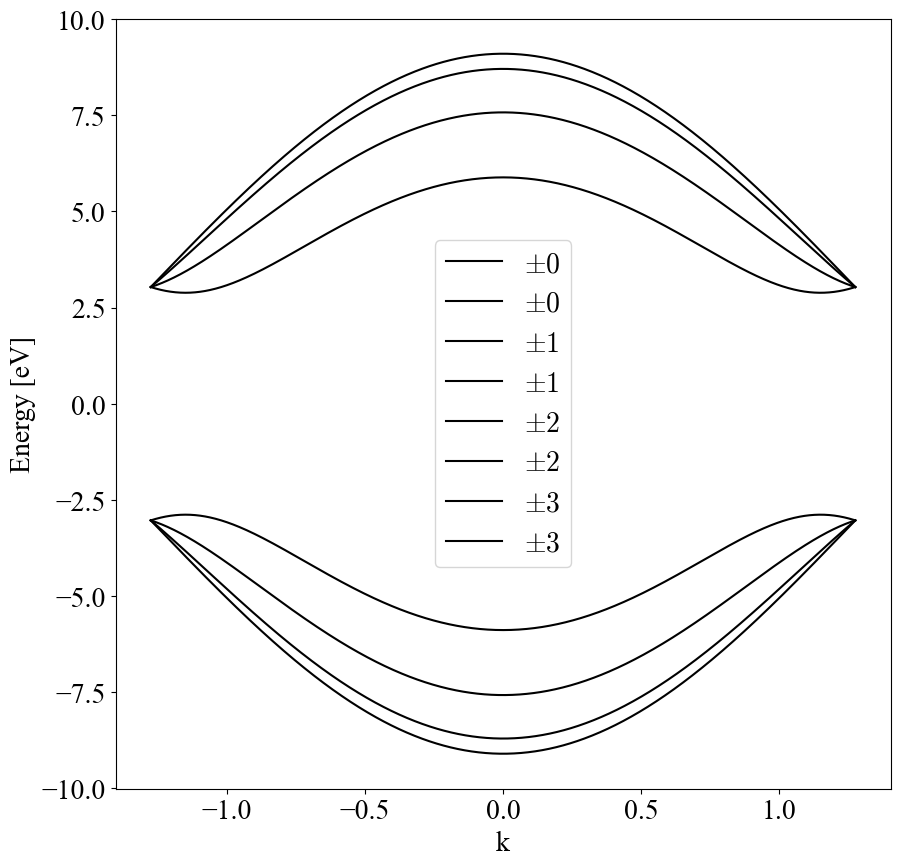

In [6]:
myband.plot_band()

In [7]:
myband.plotdos((-7, 7))

AttributeError: 'DOSOfCNT' object has no attribute 'plotdos'